# Proyecto curso: Visualización de datos 
#### Estudiantes:  
Pablo Elgueta  
Camilo Olavarría

## Introducción
Cada rubro industrial tiene su propia cultura organizacional, algunas más rígidas que otras, lo cual representa un mayor desafío en términos de transformación digital para las industrias más antiguas que suelen ser las más conservadoras en sus procesos operacionales.  

Un artículo de la revista Forbes titulado “Digital Transformation In Manufacturing: How To Implement Metrics To Foster A Data-Driven Culture” (Striletskyi 2022) indica que las herramientas de gestión de KPI de manufactura ayudan a crear un lugar donde se pueden medir todos los datos recopilados. La integración de datos de varias fuentes, como la planificación de recursos empresariales (ERP) o los manufacturing execution system (MES), en un repositorio en la nube permitirá realizar un seguimiento no solo del rendimiento de un solo factor, sino de una combinación de ellos. Esto permite ver los efectos que estos factores en conjunto están teniendo en el negocio.  

##### Referencias

STRILETSKYI, Mykola. 2022. Digital Transformation in Manufacturing: How to Implement Metrics to Foster a Data-Driven Culture [en línea]. [consultado el 12 de octubre de 2022]. Disponible en: https://www.forbes.com/sites/forbesbusinesscouncil/2022/06/21/digital-transformation-in-manufacturing-how-to-implement-metrics-to-foster-a-data-driven-culture/?sh=56a60d5e7451

## Identificación de la necesidad/problemática  
Actualmente SAP producción entrega planillas de excel con la información actualizada, sin embargo, dependiendo del área productiva, las planillas contienen bastante información la cual necesita de una limpieza para extraer la datos relevantes para crear KPIs y tomar decisiones que aporten valor al negocio.   
Crear un código que permita visualizar la información y que lea el formato del data set que entrega SAP producción contribuirá como primer acercamiento hacia una data-driven organization y aportará en el desafío de la transformación digital.

## Objetivo  

Crear un primer acercamiento hacia la manufactira digital visualizando datos entregados desde SAP producción de una forma más amigable.

#### Nota:
Las siguientes visualizaciones se hicieron con los colores corporativos.

## Importacion de Librerias y Funciones

In [1]:
# import libraries

import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.patches as mpatches
#import squarify   #Permite graficos gerarquicos por cuadrados
import matplotlib as mpl
#from pySankey.sankey import sankey  #Convinaciones de 2 variables apra las distintas muestras
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input
import plotly.express as px

C:\Users\pablo\AppData\Local\Temp\ipykernel_13760\1283120312.py:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\pablo\AppData\Local\Temp\ipykernel_13760\1283120312.py:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


## Importación Dataset y Depuración de información

In [2]:
### Importación de Dataset
path = f"C:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/02-VdI/prodagosto2022.xlsx"
frame = pd.read_excel(path)

### Filtrado de Variables a utilizar
#frame.columns
frame = frame[['Maq1','Orden Fab.','Cantidad OF','Cant. Piso','Registrado','Cant. Leida']]
frame.head()

,Maq1,Orden Fab.,Cantidad OF,Cant. Piso,Registrado,Cant. Leida
0,BB12-1,110132446,80000.0,68360.0,2022-08-05,590
1,BB12-1,110132446,80000.0,68360.0,2022-08-05,664
2,BB12-1,110132446,80000.0,68360.0,2022-08-19,717
3,BB12-1,110132446,80000.0,68360.0,2022-08-19,633
4,BB12-1,110132446,80000.0,68360.0,2022-08-30,692


## Gráfico 1: Órdenes de fabricación con menor avance

In [3]:
df_OF = frame.groupby('Orden Fab.')['Cantidad OF','Cant. Piso'].mean().reset_index()

C:\Users\pablo\AppData\Local\Temp\ipykernel_13760\2464137509.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_OF = frame.groupby('Orden Fab.')['Cantidad OF','Cant. Piso'].mean().reset_index()


In [4]:
### Función que permite agregar columna con % de cumplimiento de orden de fabricación
def porcentaje (cantof, cantpiso):
    porcentaje = cantpiso/cantof*100
    return porcentaje
df_OF['cumplimiento']=df_OF[['Cantidad OF','Cant. Piso']].apply(lambda x : porcentaje(*x), axis=1)

In [5]:
df_OF_sort=df_OF.sort_values(by='cumplimiento') #ver qué tan critica es la OF (tiempo paa cumplirla)
df_OF_top10=df_OF_sort.iloc[0:10]
df_OF_top10=pd.DataFrame(df_OF_top10)
df_OF_top10.set_index('Orden Fab.', inplace=True)

In [6]:
df_OF_top10_sorted = df_OF_top10['cumplimiento'].sort_values(ascending=False)
df_OF_top10_sorted =pd.DataFrame(df_OF_top10_sorted)
df_OF_top10_sorted['pendiente'] = 100-df_OF_top10_sorted

In [7]:
### Función que permite eliminar los bordes del gráfico
def hide_border(ax):
    ax.spines['bottom'].set_visible(False) #Linea inferior
    ax.spines['left'].set_visible(False) #Linea izquierda
    ax.spines['right'].set_visible(False) #Linea derecha
    ax.spines['top'].set_visible(False) #Linea superior

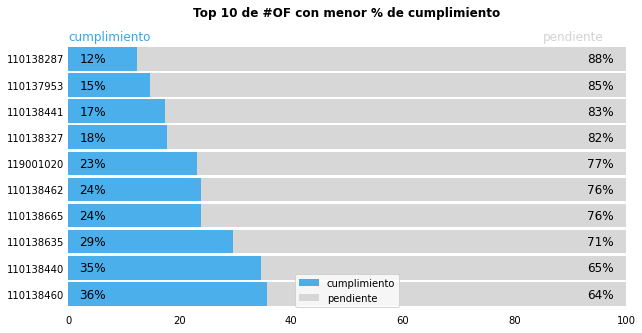

In [8]:
fontsize=12
colors = ["#36a7e9", '#d3d3d3']

ax = df_OF_top10_sorted.plot.barh(stacked=True, figsize=(10, 5), legend=False, width=0.9, alpha=0.9, xlim=(0, 100),
                        color=colors)

hide_border(ax)   #Ocultar bordes
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')
ax.set_title("Top 10 de #OF con menor % de cumplimiento", pad=24, fontweight=700)
ax.title.set_position([.5, 1])
percents = df_OF_top10_sorted.columns
ax.text(0, df_OF_top10_sorted.shape[0]-0.3, #ubicacion horizontal, posicion vertica,
        percents[0], color=colors[0], fontsize=fontsize)  #nombre de la variable, color del texto, tamaño texto 
ax.text(85, df_OF_top10_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

for p in ax.patches:
    if p.xy[0] == 0:
        xpos = 2
    else:
        xpos = 93
    ax.annotate(str(int(round(p.get_width()))) + "%", (xpos, p.xy[1] + 0.3), color='black', fontsize=fontsize)

plt.legend(loc=8, prop={'size': 10})  #ajustar leyenda
    
plt.show()

###### ¿Para qué sirve el gráfico "Top 10 de #OF con menor % de cumplimiento"?
Gracias a esta visualización las órdenes de fabricación que les falta ser completadas podrán ser consideradas en la planificación de producción. Además de investigar las razones operacionales del por qué no han logrado un alto porcentaje de cumplimiento.

## Gráfico 2: Productos entre 90-99% de cumplimiento (posible origen de reclamos)

In [9]:
df_OF_filt9099 = df_OF[(df_OF['cumplimiento']>=90)& (df_OF['cumplimiento']<100)]
df_OF_filt9099_sort = df_OF_filt9099.sort_values(by='cumplimiento',ascending=True) 
df_OF_filt9099_sort['pendiente'] = 100-df_OF_filt9099_sort['cumplimiento']
df_OF_filt9099_sort_top20 = df_OF_filt9099_sort.tail(20)
df_OF_filt9099_sort_top20 = pd.DataFrame(df_OF_filt9099_sort_top20)
df_OF_filt9099_sort_top20 = df_OF_filt9099_sort_top20.sort_values(by='cumplimiento',ascending=True)
df_OF_filt9099_sort_top20 =pd.DataFrame(df_OF_filt9099_sort_top20)

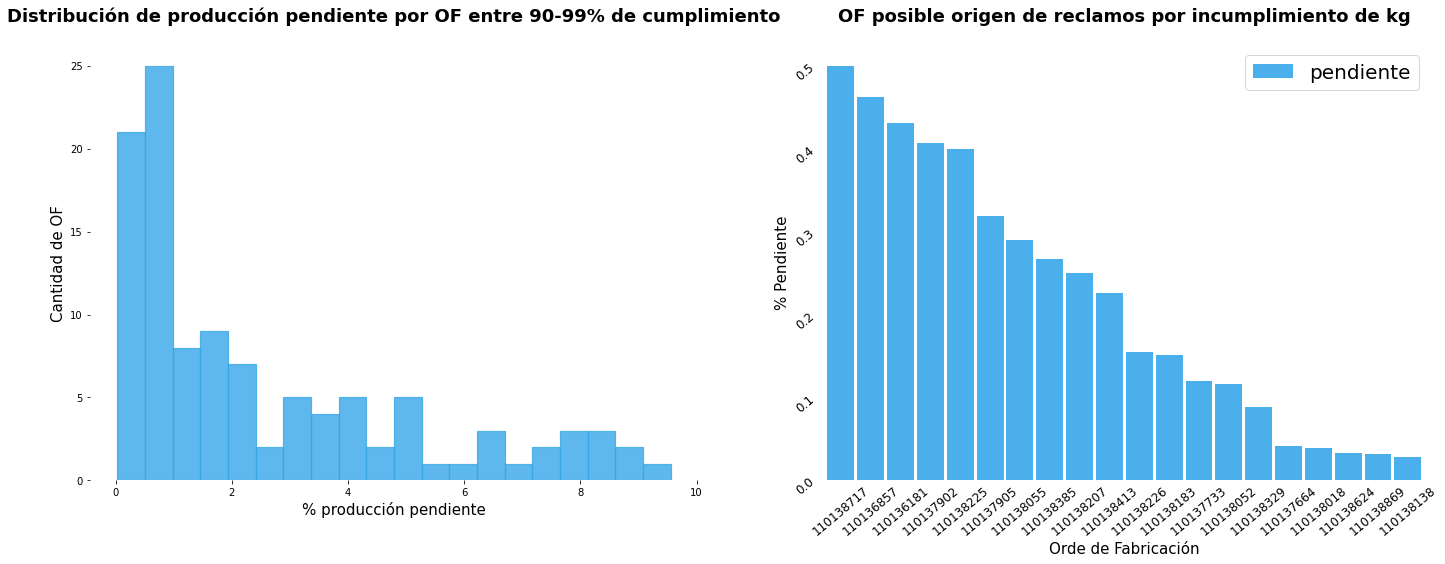

In [10]:
colors = ["#36a7e9"]

fig, ax = plt.subplots(1, 2, figsize=(24, 8))

#Gráfico de Distribución de producción pendiente por OF entre 90-99% de cumplimiento
df_OF_filt9099_sort['pendiente'].plot.hist( edgecolor = "#36a7e5", linewidth = 1.2, bins =20,alpha=0.8, color=colors, ax=ax[0])
hide_border(ax[0])   #Ocultar bordes
ax[0].set_title("Distribución de producción pendiente por OF entre 90-99% de cumplimiento", pad=24, fontsize=18, fontweight=600)
ax[0].set_ylabel('Cantidad de OF', fontsize=15)
ax[0].set_xlabel('% producción pendiente', fontsize=15)

#Gráfico OF posible origen de reclamos por incumplimiento de kg
df_OF_filt9099_sort_top20.plot.bar(x='Orden Fab.', y='pendiente', width=0.9, alpha=0.9, fontsize=12, color=colors, ax=ax[1]) #width permite definir el ancho de la barra
hide_border(ax[1])   #Ocultar bordes
ax[1].tick_params(axis=u'both', which=u'both', length=0)
ax[1].set_title("OF posible origen de reclamos por incumplimiento de kg", pad=24, fontsize=18, fontweight=600)
ax[1].set_ylabel('% Pendiente', fontsize=15)
ax[1].set_xlabel('Orde de Fabricación', fontsize=15)
ax[1].title.set_position([.5, 1])
ax[1].tick_params( which= 'major', rotation=40) #Ajustes de lineas de ejes

plt.legend(loc=0, prop={'size': 20})  #ajustar leyenda

plt.show()


###### ¿Para qué sirve el gráfico "Distribución de producción pendiente por OF entre 90-99% de cumplimiento"?
Gracias a esta visualización se podrá analizar que existe mayor cantidad de OF que tienen menos de 2% de producción pendiente, es importante lograr identificarlas y poner precaución que no salgan de la planta sin haber completado la producción programada. Si los alambres que les falta muy poco para completar lo programado se liberan y se envían al cliente, será un posible origen de reclamo por no cumplir con los kg acordados por contrato. Suele suceder que como no existe un visualización de esta problemática, se envían productos que no cumplen el 100% de lo exigido. 

###### ¿Para qué sirve el gráfico "OF posible origen de reclamos por incumplimiento de kg"?
Este gráfico es complementario al anterior, con este gráfico es posible identificar el número de las OF con posible conflicto y hacer un seguimiento en planta para lograr completar el 100% de lo exigido por el cliente.

## Gráfico 3: Producción diaria y tendencia

In [11]:
frame_sum_cant=frame.groupby("Registrado").sum()
frame_sum_cant.head()

,Orden Fab.,Cantidad OF,Cant. Piso,Cant. Leida
Registrado,,,,
2022-08-01,39429106928,93626254.0,7.830951e+07,276527
2022-08-02,37336531265,81915736.0,6.872289e+07,267943
2022-08-03,32380385002,70739217.0,5.976380e+07,233679
2022-08-04,29296544065,63554473.0,5.383996e+07,208826
2022-08-05,22723737025,59009520.0,4.966411e+07,166607


In [12]:
import statsmodels.api as sm
frame_sum_cant_ciclo, frame_sum_cant_tend = sm.tsa.filters.hpfilter(frame_sum_cant['Cant. Leida'])
frame_sum_cant['tend'] = frame_sum_cant_tend

In [ ]:
color1='#36a7e9'
color2='#ff9f00'
color3='black'
color4='darkblue'

fig, ax = plt.subplots( figsize=(30,10))

frame_sum_cant[['Cant. Leida']].plot(figsize=(30, 10), fontsize=20, linewidth=5.0, color='#36a2e9', linestyle='solid', ax=ax);
ax.fill_between(frame_sum_cant.index, frame_sum_cant['Cant. Leida'], 0, color=color1)

frame_sum_cant[['tend']].plot(figsize=(30, 10), fontsize=20, linewidth=6.0, color=color2, linestyle='--' , ax=ax);

ax.set_title("Producción Agosto", fontsize = 30 )
ax.spines['bottom'].set_color(color4), ax.spines['bottom'].set_linewidth(3) #Linea inferior
ax.spines['left'].set_color(color4), ax.spines['left'].set_linewidth(3) #Linea izquierda
ax.set_ylabel("Volumen de Producción (Kg)", fontsize = 24, color=color3)  #Etiquetas eje y
ax.set_xlabel("Fecha de Registro", fontsize = 24, color=color3)          #Etiquetas ejex
ax.spines['right'].set_visible(False) #Linea derecha
ax.spines['top'].set_visible(False) #Linea superior

ax.tick_params(colors=color3, which='both', rotation=40) #Ajustes de lineas de ejes

plt.xlim(frame_sum_cant.index[0],) #ajustar origen eje x
plt.ylim(0,)                        #ajustar origen eje y
plt.legend(loc=3, prop={'size': 20})  #ajustar leyenda
fig.tight_layout()

###### ¿Para qué sirve el gráfico "Producción Agosto"?
En este gráfico es posible visualizar la producción diaria durante el mes de Agosto. No considera los días domingo que no se suelen trabajar. Sin embargo, los días sábados solo se trabajan 10 hrs y no 24 hrs al día (con turnos de 8 hrs), lo que claramente muestra una baja producción. Además los sábados también se suelen hacer inventarios y se ordena la planta.  
La planta debería apuntar a tener una producción constante como meta ya que siempre cuenta con el mismo personal para ejecutar sus tareas. También el gráfico muestra peaks de producción, eso significa que la planta tiene esa capacidad para generar mayor producción. Si esta información lo tomara área de planificación, podría incluso eliminar un turno si se trabaja más eficiente 5 días a la semana. Trabajar los sábados no aporta tanto valor a nivel productivo. Claramente con el proyecto de 40 hrs, los sábados donde la producción es bajísima serán eliminados.  
En conclusión, este gráfico muestra un indicio que los sábados no aportan significativamente a la producción y podrán ser eliminados cuando se aprueba el proyecto de 40 horas semanales. 

## Gráfico 4: Productividad diaria en área de trefilación

In [14]:
frame_sum_cant=frame.groupby("Registrado").sum().reset_index()
frame_sum_cant.head()

,Registrado,Orden Fab.,Cantidad OF,Cant. Piso,Cant. Leida
0,2022-08-01,39429106928,93626254.0,7.830951e+07,276527
1,2022-08-02,37336531265,81915736.0,6.872289e+07,267943
2,2022-08-03,32380385002,70739217.0,5.976380e+07,233679
3,2022-08-04,29296544065,63554473.0,5.383996e+07,208826
4,2022-08-05,22723737025,59009520.0,4.966411e+07,166607


In [15]:
frame_sum_cant["Registrado"] = pd.to_datetime(frame_sum_cant["Registrado"])
a=frame_sum_cant["Registrado"]

In [16]:
import pandas as pd

df = pd.DataFrame(a)
df['my_dates'] = pd.to_datetime(df['Registrado'])
df['day_of_week'] = df['Registrado'].dt.dayofweek

days = {0:'Lunes',1:'Martes',2:'Miercoles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}

df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

In [17]:
d = pd.concat([frame_sum_cant, df], axis=1)

In [18]:
d['horas trabajadas'] = d['day_of_week'].apply(lambda x: 10 if x=='Sabado'else 24)

In [19]:
d=d.drop(d[d['day_of_week']=='Domingo'].index) #eliminé el domingo, porque ese día no se trabaja, el dato era erroneo

In [20]:
clean_d=d.drop(d.columns[[0]], axis=1)

In [21]:
def productividad (horas, kg):
    productividad = horas/(kg/1000)
    return productividad

clean_d['productividad h/ton'] = clean_d[['horas trabajadas','Cant. Leida']].apply(lambda x: productividad(*x), axis=1)

In [22]:
cantidad_dias=clean_d['my_dates'].count()

In [23]:
clean_d['productividad h/ton'].describe()

count    26.000000
mean      0.244430
std       0.516653
min       0.086791
25%       0.113833
50%       0.127986
75%       0.166923
max       2.763958
Name: productividad h/ton, dtype: float64

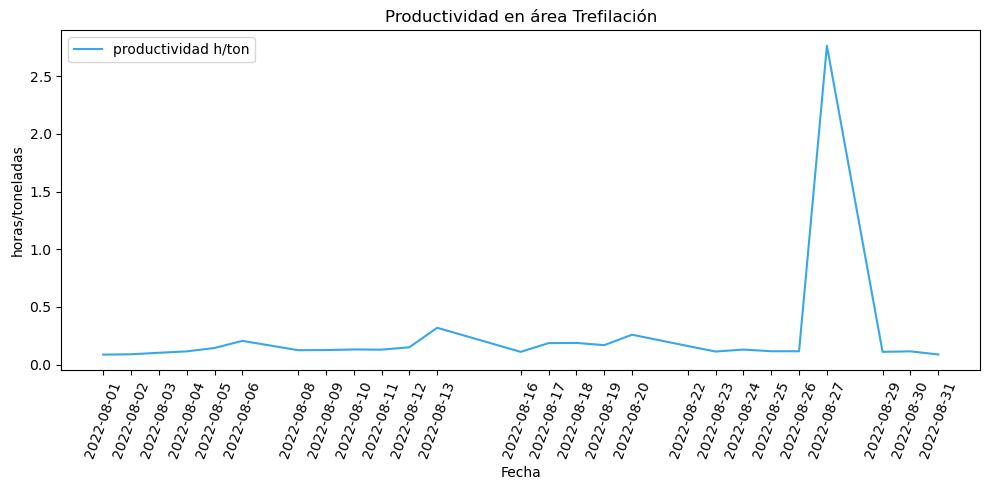

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
ax.plot(clean_d['my_dates'], clean_d['productividad h/ton'], label='productividad h/ton', color='#36a7e9')
ax.set_title("Productividad en área Trefilación")
ax.set_xlabel("Fecha")
ax.set_ylabel("horas/toneladas")
plt.xticks(clean_d['my_dates']) 
plt.xticks(rotation = 70)
ax.legend()
fig.tight_layout()
plt.show()

###### ¿Para qué sirve el gráfico "Productividad en área trefilación"?
En este gráfico es posible visualizar la productividad diaria, considerando 24 hrs disponibles cada día de lunes a viernes y sábados sólo 10 horas disponibles. El siguiente KPI analiza el área de trefilación, mientras más bajo este indicador significa que se tiene una mejor productividad. Es decir, este indicador de productividad considera cuántas horas fueron necesarias para producir una tonelada de material, en este caso, en promedio se necesitaron 0,24 h para producir una tonelada. Cabe notar que los días sábados el el indicador sube, lo que significa que para producir una toneladas se necesitaron más horas. Con esto se puede ver que no es tan proporcional lo solicitado para producir los sábados durante las 10 hrs que se trabajan.

A continuación se intentó realizar el mismo gráfico, pero más interactivo para así eliminar las fechas y saber con exactitud pasando el cursor por encima de la gráfica y obtener la información del indicador.

In [25]:
!pip install plotly
!pip install cufflinks
import cufflinks as cf
from IPython.display import display, HTML
cf.set_config_file(sharing="public",theme='white',offline=True)
cf.getThemes()


['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [26]:
clean_d[['my_dates', 'productividad h/ton']].iplot(x='my_dates', y='productividad h/ton',xTitle='Fecha', yTitle='horas/toneladas', title='Productividad área trefilación:', color='#36a7e9')

## Anexo: Exploración de Producción Máquinas

### Introducción

Como análisis complementario al realizado para la producción por turnos en base a la base de datos proporcionada por SAP, se podría proyectar un estudio relacionado con las máquinas y su eficiencia. Esto se podría realizar mediante la base de datos proporcionada por el sistema de Adquisición y Control de Datos SCADA, el cual interactúa con el sistema de control y genera las bases de datos a nivel de procesos.

Esta base de datos, normalmente contiene información respecto a consumos eléctricos, horas de funcionamiento, fallas e inactividades de equipos.

### 1.- Gráfico de Producción por Máquinas

In [27]:
## Dataframe Maquinas
df_maquinas = frame.groupby(by=['Maq1'])['Cant. Leida'].sum().reset_index()
df_maquinas.head()

,Maq1,Cant. Leida
0,B 92,1014
1,BAZ 10,33679
2,BB 31,21667
3,BB 52,106283
4,BB 62,243587


In [28]:
df_maquinas_ord=df_maquinas.sort_values(by='Cant. Leida', ascending=False)
df_maquinas_ord10=df_maquinas_ord.iloc[0:10]
df_maquinas_ord10=pd.DataFrame(df_maquinas_ord10)
resto={'Maq1':'Resto', 'Cant. Leida': df_maquinas_ord.iloc[11:len(df_maquinas_ord)]['Cant. Leida'].sum()}
df_maquinas_ord10 = df_maquinas_ord10.append(resto, ignore_index=True)

C:\Users\pablo\AppData\Local\Temp\ipykernel_13760\3086395187.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [29]:
total = df_maquinas['Cant. Leida'].sum()
df_maquinas_ord10['porcentaje'] = df_maquinas_ord10.apply(lambda x: x['Cant. Leida']/total, axis=1)  #Porcion de Aporte para la opcion

pmin = df_maquinas_ord10['porcentaje'].min()
pmax = df_maquinas_ord10['porcentaje'].max()
normA = mpl.colors.Normalize(vmin=pmin, vmax=pmax) 
cmapA = mpl.cm.Blues

df_maquinas_ord10['norm'] = df_maquinas_ord10.apply(lambda x: normA(x['porcentaje']), axis=1)  #Normaliza porciones de aporte
df_maquinas_ord10['color'] = df_maquinas_ord10.apply(lambda x: cmapA(x['norm']), axis=1)  #define colores

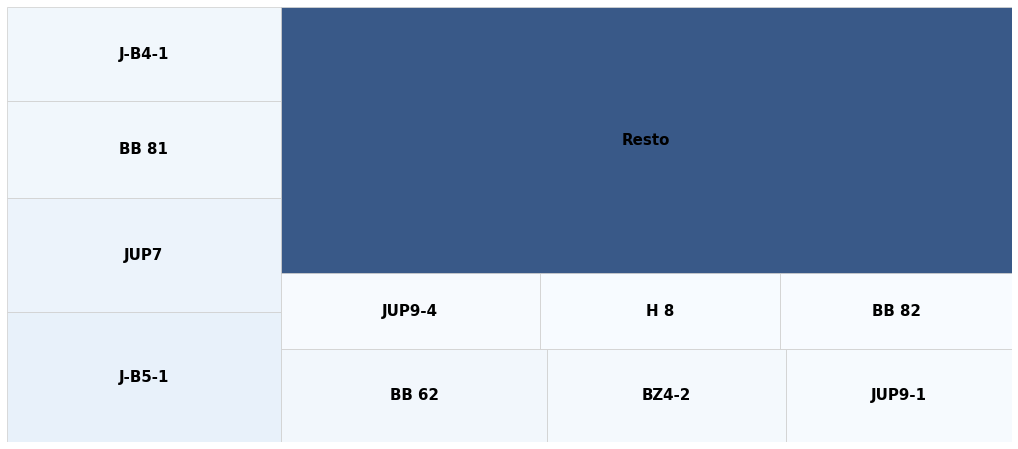

El porcentaje de producción de las 10 máquinas más utilizadas es de 57.09%


In [30]:
import squarify   #Permite graficos gerarquicos por cuadrados

fig, ax = plt.subplots(1,1, figsize=(18, 8))

squarify.plot(sizes=df_maquinas_ord10['Cant. Leida'], color=df_maquinas_ord10['color'], label=df_maquinas_ord10['Maq1'], 
              alpha=0.8, ax=ax,
             text_kwargs={'fontsize': 15, 'color': 'black', 'weight': 'bold'}, edgecolor='#d2d2d2')
plt.axis('off')
plt.show()

print(f"El porcentaje de producción de las {len(df_maquinas_ord10)-1} máquinas más utilizadas es de {round((1-df_maquinas_ord10['porcentaje'][len(df_maquinas_ord10)-1])*100, 2)}%")

##### ¿Para qué sirve el gráfico de Producción por Máquina?

Este gráfico demuestra que el 57% de la producción es generada por las 10 máquinas más utilizadas. 

Sin embargo, esto no necesariamente significa que sean las máquinas mas eficientes o de mayor capacidad de producción, sino que también podría significar que son las que han presentado menor cantidad de fallas u otro factor que influya en su uso mayoritario.

Un análisis de eficiencia por máquinas (consumo eléctrico/producción u otro indicador) o bien de los tiempos de disponibilidad de cada máquina (cuando no ha estado fuera de servicio por falla o mantención), podría entregar información valiosa respecto a como mejorar la producción.

### 2.- Gráfico Dinámico de Producción por Máquina

Este gráfico permite analizar o explorar los datos referentes a la proporción de producción de cada máquina. 
- Posee en la parte superior una pestaña que permite seleccionar las diferentes máquinas.
- Bajo la pestaña de selección, se indican las máquinas ya seleccionadas y graficadas. Cada uno de los recuadros asociados a las máquinas posee una pestaña que permite eliminarla del gráfico.
- Al posicionar el mause sobre una de las porciones del gráfico, se despliega un popup con el nombre de la máquina y su respectiva producción durante el mes de agosto en kg.
- Al costado derecho del gráfico, figura la leyenda del gráfico. Haciendo un click izquierdo sobre una de las leyendas asociada a una máquina se puede quitar de la representación, y al volver a clickear vuelve a aparecer. 


In [31]:
## Funcion Dash Maquinas
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css'] #Link para estilo externo del dashboard

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)  #Define el dashboard con (nombre, estilo)

app.layout = html.Div([                                           #Define que se despliegue como html
    dcc.Dropdown(id='dpdn2', value=['B 92','BAZ 10'],          #Define los trazos (Alemania y Brasil como iniciales)
                 multi=True,                                      #Define la opcion de intercambiar entre diferentes etiquetas a graficar   
                 options=[{'label': x, 'value': x} for x in       #Define las opciones de etiquetas a seleccionar y visualizar
                          df_maquinas.Maq1.unique()]),
    html.Div([                                                              #Define las divisiones del dashboard
        dcc.Graph(id='pie-graph', figure={},           #Define tagname gráfico de torta
                 className='six columns'                   #Permite dividir el dashboard para varios graficos
                 )      
        
    ])
])

In [32]:
# Callback Torta Maquinas
@app.callback(
    Output(component_id='pie-graph', component_property='figure'),
    Input(component_id='dpdn2', component_property='value')
)
def update_side_graph(country_chosen):
    
    dff2 = df_maquinas[df_maquinas.Maq1.isin(country_chosen)]     #define que el grafico s actualice con la muestra seleccionada
    '''Se puede intentar agregar a ddf2 una fila q tenga la suma total de cantidad leida de df_maquinas menos las de ddf2'''
    resto_valor=df_maquinas['Cant. Leida'].sum()
    resto={'Maq1':'Producción Restante', 'Cant. Leida':resto_valor}
    dff2=dff2.append(resto, ignore_index=True)
    print(dff2)
    
    
    print(resto)
    fig2 = px.pie(data_frame=dff2, values='Cant. Leida', names='Maq1',
                    title='Producción por máquina durante agosto')
    return fig2
    

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
